# TASK 4: Disease Prediction from Medical Data
**Objective:**

Predict the possibility of diseases based on patient data.

**Approach:**
Apply classification techniques to structured medical datasets.

**Key Features:**

● Use features like symptoms, age, blood test results, etc.

● Algorithms: SVM, Logistic Regression, Random Forest, XGBoost.

● Datasets: Heart disease, Diabetes, Breast Cancer (UCI ML Repository).

**Install Required Libraries**

In [ ]:
# Install XGBoost (if not already available in Colab)
!pip install xgboost --quiet


**Import Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Load the Dataset**

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


**Explore the Data**

In [ ]:
# Basic dataset info
print("Dataset Info:")
print(df.info())

# Check distribution of target (balanced or imbalanced?)
print("\nTarget value counts:\n", df['target'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness e

**Visualize Correlations**

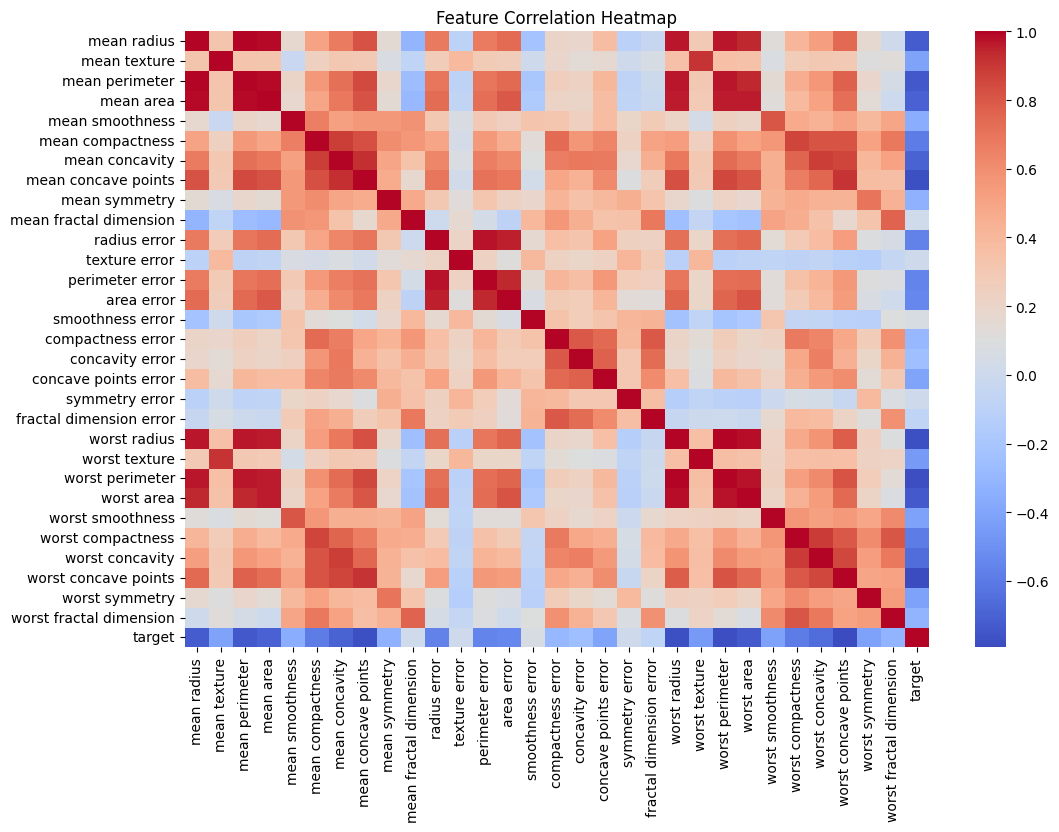

In [ ]:
# Visualize correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Prepare the Data**

In [ ]:
# Split features and labels
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Standardize the Features**

In [ ]:
# Scale the features (important for models like SVM, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Train and Evaluate Multiple Models**

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store accuracy
results = {}

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)            # Train the model
    y_pred = model.predict(X_test)         # Make predictions

    acc = accuracy_score(y_test, y_pred)   # Accuracy
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix
    cr = classification_report(y_test, y_pred)  # Precision, recall, f1-score

    results[name] = acc  # Save accuracy

    # Print evaluation
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)



Logistic Regression
Accuracy: 0.9737
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Support Vector Machine
Accuracy: 0.9825
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Random Forest
Accuracy: 0.9561
Confusion Matrix:
 [[40  3]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   sup

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Visualize Model Accuracy**

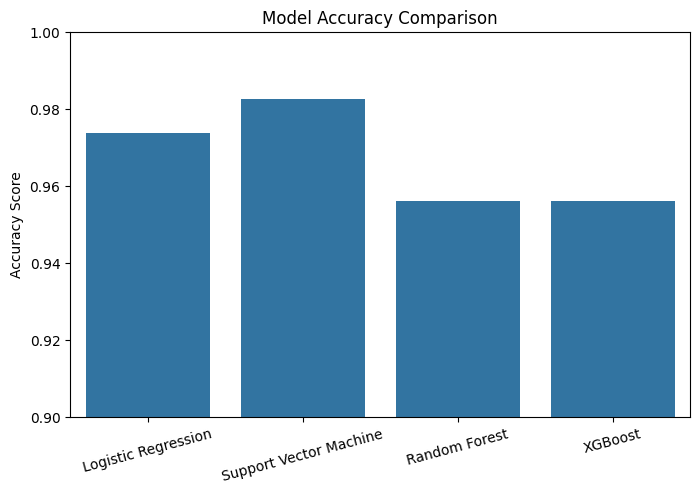

In [ ]:
# Visual comparison of model accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.9, 1)  # Since models are very accurate
plt.xticks(rotation=15)
plt.show()
